In [3]:
import cv2 as cv
import glob
import matplotlib.pyplot as plt
import numpy as np

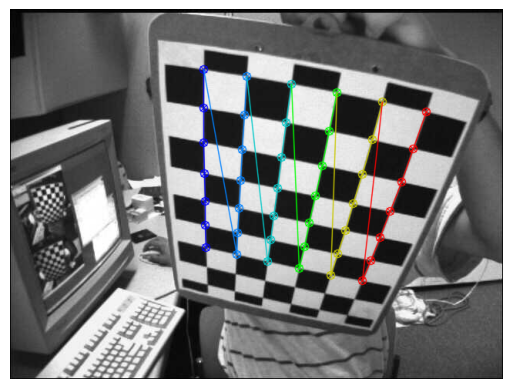

In [7]:
# Termination criteria
criteria = (cv.TERM_CRITERIA_EPS + cv.TERM_CRITERIA_MAX_ITER, 30, 0.001)

# Prepare object points, like (0,0,0), (1,0,0), (2,0,0) ....,(6,5,0)
objp = np.zeros((6 * 7,3), np.float32)
objp[:, :2] = np.mgrid[0:7, 0:6].T.reshape(-1,2)

object_points = [] # 3D point in real world space
image_points = []  # 2D points in image plane.

images_path = glob.glob("images/*.jpg")

for path in images_path:
    image = cv.imread(path)
    gray = cv.cvtColor(image, cv.COLOR_BGR2GRAY)

    # Find the chess board corners
    found, corners = cv.findChessboardCorners(gray, (7,6), None)

    if found:
        object_points.append(objp)
        corners2 = cv.cornerSubPix(gray,corners, (11,11), (-1,-1), criteria)
        image_points.append(corners2)

        # Draw and display the corners
        cv.drawChessboardCorners(image, (7,6), corners2, found)

        plt.axis("off")
        plt.imshow(image)